In [4]:
pip install opencv-python -i "https://pypi.tuna.tsinghua.edu.cn/simple"

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


C:\Users\Administrator\Desktop\计算机视觉实践-练习2
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:04<00:00, 2338386.44it/s]


Extracting C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 50891.64it/s]


Extracting C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:02<00:00, 730076.51it/s]


Extracting C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3023413.55it/s]


Extracting C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Administrator\Desktop\计算机视觉实践-练习2/dataset\MNIST\raw

start_time 2024-05-17 00:13:45
Train Epoch1 	 Loss: 2.316896, accuracy: 7.812500%
test_avarage_loss: 0.003857, accuracy: 96.090000%
end_time:  2024-05-17 00:14:04 

start_time 2024-05-17 00:14:04
Train Epoch2 	 Loss: 0.113733, accuracy: 98.437500%
test_avarage_loss: 0.002736, accuracy: 97.220000%
end_time:  2024-05-17 00:14:19 

start_time 2024-05-17 00:14:19
Train Epoch3 	 Loss: 0.036974, accuracy: 100.000000%
test_avarage_loss: 0.002212, accuracy: 97.910000%
end_time:  2024-05-17 00:14:33 

start_time 2024-05-17 00:14:33
Train Epoch4 	 Loss: 0.048258, accuracy: 98.437500%
test_avarage_loss: 0.001896, accuracy: 98.000000%
end_time:  2024-05-17 00:14:47 

start_time 2024-05-17 00:14:47
Train Epoch5 	 Loss: 0.041944, accuracy: 98.437500%
test_avarage_loss: 0.001856, accuracy: 98.130000%
end_time:  2024-05-17 00:15:01 

start_t

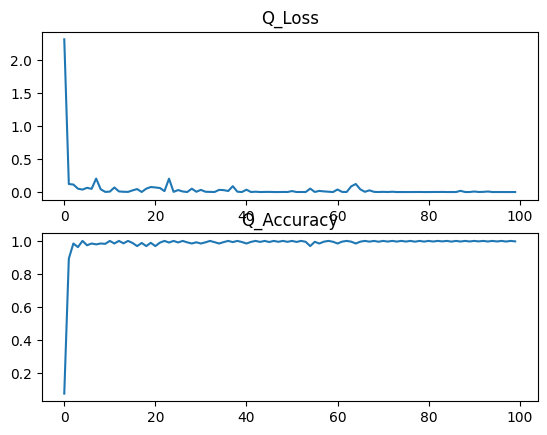

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
C:\Users\Administrator\Desktop\计算机视觉实践-练习2/models/mnist.pth


RuntimeError: Parent directory C:\Users\Administrator\Desktop\计算机视觉实践-练习2/models does not exist.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import time
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  #创建一个输入通道为1，输出feature map数量为6,卷积核大小5*5
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)   #池化窗口为2，步长为2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*5*5, 120)  #全连接层 输出特征维度120
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output
   

#定义训练过程  
def train_LeNet(model, device, trainloader, optimizer, epoch):
    #训练模型, 启用 BatchNormalization 和 Dropout, 将BatchNormalization和Dropout置为True
    model.train()
    total = 0
    correct =0.0
    
    #enumerate迭代已加载的数据集,同时获取数据和数据下标
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #把模型部署到device上
        inputs, labels = inputs.to(device), labels.to(device)
        #初始化梯度
        optimizer.zero_grad()
        #保存训练结果
        outputs = model(inputs)
        #计算损失和
        #多分类情况通常使用cross_entropy(交叉熵损失函数), 而对于二分类问题, 通常使用sigmod
        loss = F.cross_entropy(outputs, labels)
        #获取最大概率的预测结果
        #dim=1表示返回每一行的最大值对应的列下标
        predict = outputs.argmax(dim=1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        if i % 1000 == 0:
            #loss.item()表示当前loss的数值
            print("Train Epoch{} \t Loss: {:.6f}, accuracy: {:.6f}%".format(epoch, loss.item(), 100*(correct/total)))
            Loss.append(loss.item())
            Accuracy.append(correct/total)
    return loss.item(), correct/total


#定义测试过程
def test_LeNet(model, device, testloader):
    #模型验证, 必须要写, 否则只要有输入数据, 即使不训练, 它也会改变权值
    #因为调用eval()将不启用 BatchNormalization 和 Dropout, BatchNormalization和Dropout置为False
    model.eval()
    #统计模型正确率, 设置初始值
    correct = 0.0
    test_loss = 0.0
    total = 0
    #torch.no_grad将不会计算梯度, 也不会进行反向传播
    with torch.no_grad():
        for data, label in testloader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, label).item()
            predict = output.argmax(dim=1)
            #计算正确数量
            total += label.size(0)
            correct += (predict == label).sum().item()
        #计算损失值
        print("test_avarage_loss: {:.6f}, accuracy: {:.6f}%".format(test_loss/total, 100*(correct/total)))


#利用训练好的模型进行数字识别
def test_model(path):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = torch.load(path + '/models/mnist.pth') #加载模型
    model = model.to(device)
    model.eval()    #把模型转为test模式
    
    #读取要预测的图片
    img = cv2.imread(path + "/img/9_x.jpg")
    img=cv2.resize(img,dsize=(32,32),interpolation=cv2.INTER_NEAREST)
    plt.imshow(img,cmap="gray") # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.title('Q_number')
    plt.show()
    
    # 导入图片，图片扩展后为[1，1，32，32]
    trans = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#图片转为灰度图，因为mnist数据集都是灰度图
    img = trans(img)
    img = img.to(device)
    img = img.unsqueeze(0)  #图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
    print(img.shape)
    
    #预测 
    output = model(img)
    print(output)
    prob = F.softmax(output,dim=1) #prob是10个分类的概率
    print("概率：",prob)
    value, predicted = torch.max(output.data, 1)
    predict = output.argmax(dim=1)
    print("预测类别：",predict.item())

    
if __name__ =="__main__":   
    '''
    1、定义数据预处理方式
    '''
    pipline_train = transforms.Compose([    #训练集
        #随机旋转图片
        transforms.RandomHorizontalFlip(),
        #将图片尺寸resize到32x32
        transforms.Resize((32,32)),
        #将图片转化为Tensor格式
        transforms.ToTensor(),
        #正则化(当模型出现过拟合的情况时，用来降低模型的复杂度)
        transforms.Normalize((0.1307,),(0.3081,))    
    ])    
    pipline_test = transforms.Compose([     #测试集
        #将图片尺寸resize到32x32
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,),(0.3081,))
    ])
    
    '''
    2、数据集获取并加载
    '''   
    #下载数据集 
    path = os.getcwd()
    print(path)
    train_set = datasets.MNIST(root= path+"/dataset", train=True, download=True, transform=pipline_train)
    test_set = datasets.MNIST(root= path+"/dataset", train=False, download=True, transform=pipline_test)
    #加载数据集
    trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)    
     
    '''
    3、定义模型与优化器
    '''
    #创建模型，部署gpu
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = LeNet().to(device)
    #定义优化器
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    '''
    4、模型训练并计算loss和accuracy
    '''
    #调用
    epoch = 50
    Loss = []
    Accuracy = []
    for epoch in range(1, epoch+1):
        print("start_time",time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
        loss, acc = train_LeNet(model, device, trainloader, optimizer, epoch)
        Loss.append(loss)
        Accuracy.append(acc)
        test_LeNet(model, device, testloader)
        print("end_time: ",time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'\n')

    print('Finished Training')
    plt.subplot(2,1,1)
    plt.plot(Loss)
    plt.title('Q_Loss')
    # plt.show()
    plt.subplot(2,1,2)
    plt.plot(Accuracy)
    plt.title('Q_Accuracy')
    plt.show()
    

    '''
    5、模型保存
    '''
    print(model)
    # path = os.path.dirname(os.path.abspath(__file__))
    current_dir = os.getcwd()
    weight_path = current_dir + '/models/mnist.pth'
    print(weight_path)
    torch.save(model, weight_path) #保存模型   
    
    '''
    6、模型测试
    '''
    path = os.path.dirname(os.path.abspath(__file__))
    test_model(path)